# Visualization of molar volume during a liquid-gas phase transition


**Code:** #112-000

**File:** `apps/van_der_waals/phase_transition_volume.ipynb`

**Run it online:** [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jongablop/MinervaLab/master?urlpath=%2Fnotebooks%2Fapps%2Fvan_der_waals%2Fphase_transition_volume.ipynb)

-----------

The aim of this notebook is to visualize the change in molar volume during a first-orden liquid-gas transition.

## Interface

The main interface (``main_block_112_000``) is divided in two HBox: ``top_block_112_000`` and ``bottom_block_112_000``. ``bottom_block_112_000`` contains of 3 bqplot Figures: ``fig_112_001``, ``fig_112_002`` and ``fig_112_003``.  

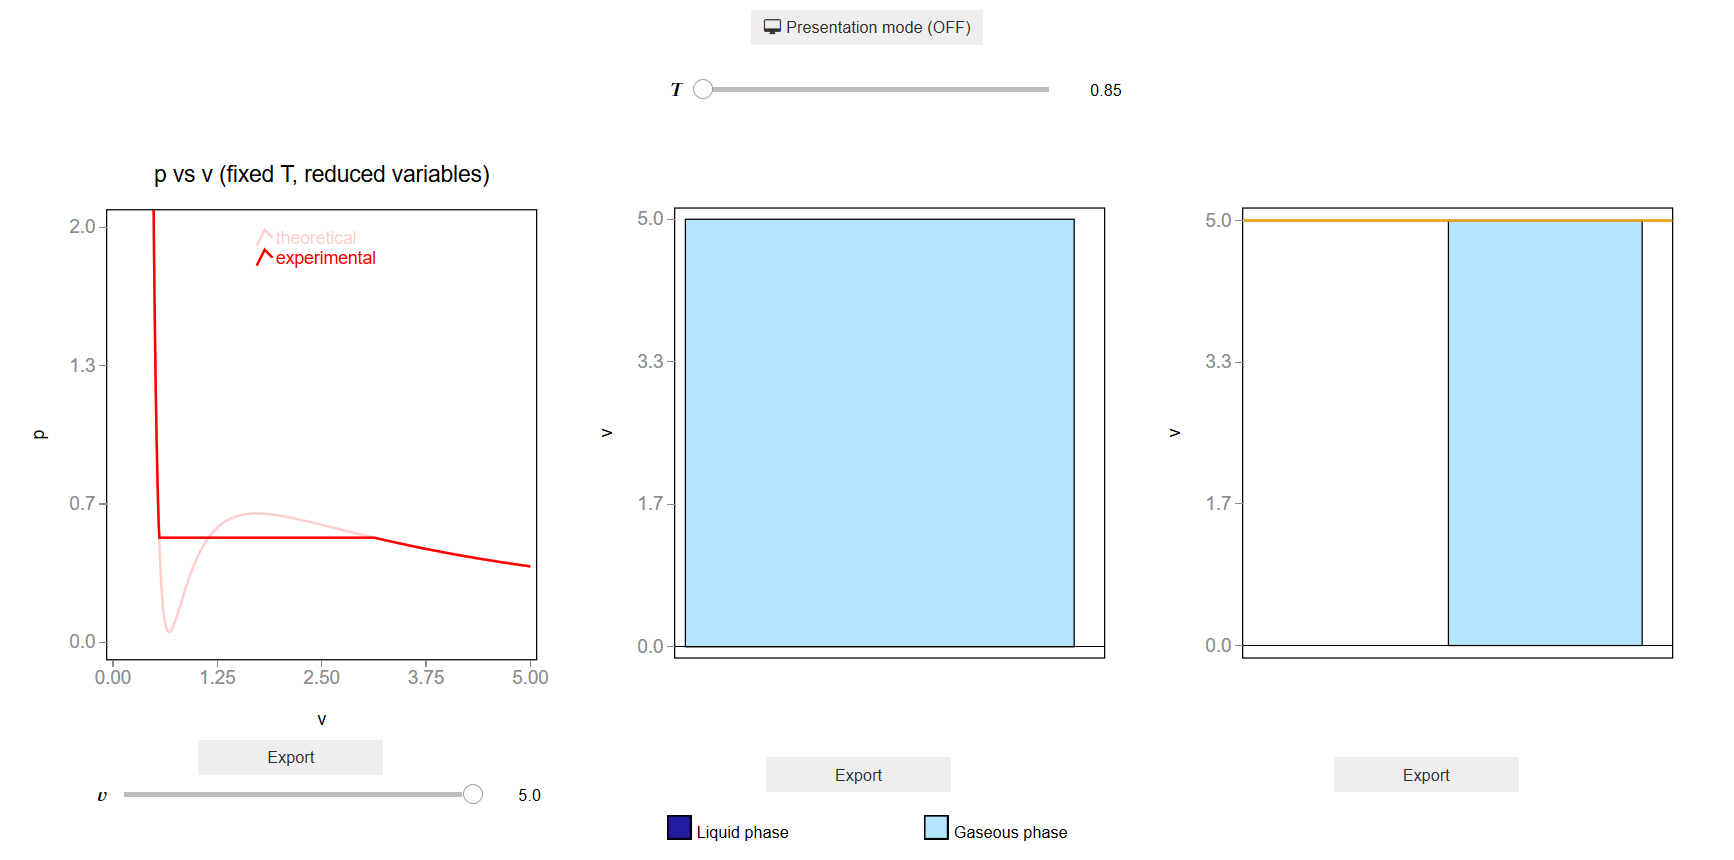

In [22]:
from IPython.display import Image
Image(filename='../../static/images/112-000_1.png')

The slider ``T_slider`` updates the values of $T$ which updates the bars and scatter points of ``fig_112_001``, ``fig_112_002`` and ``fig_112_003``.

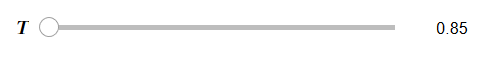

In [23]:
Image(filename='../../static/images/112-000_2.png')

## CSS

A custom `css` file is used to improve the interface of this application. It can be found [here](https://github.com/jongablop/MinervaLab/blob/master/static/custom.css).

In [3]:
from IPython.display import HTML
display(HTML("<head><link rel='stylesheet' type='text/css' href='./../../static/custom.css'></head>"))
display(HTML("<style>.container { width:100% !important; }</style>"))

## Packages

In [4]:
from bqplot import *
import bqplot as bq
import bqplot.marks as bqm
import bqplot.scales as bqs
import bqplot.axes as bqa

import ipywidgets as widgets

import numpy as np

import urllib.parse
import webbrowser

import sys

## Physical functions

This are the functions that have a physical meaning:

- `get_relative_isotherms`
- `experimetal_isotherms`
- `get_roots`
- `p_indefinite_integral`
- `p_definite_integral`
- `find_real_fixed_T`
- `get_volumes_propotions`

In [5]:
def get_relative_isotherms(v_range, T_range):
    """This function calculates the theoretical p(v, T) plane 
        (in reduced coordinates) according to Van der Waals
        equation of state from a given range of volumes
        and tenperatures.

    Args:
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n

        
    Returns:
        isotherms: A list consisted consisted of numpy arrays containing the
        pressures of each isotherm.
    """

    isotherms = []

    for T in T_range:
        p_R = []
        for v in v_range:
            val = (8.0/3.0*T/(v - 1.0/3.0) - 3.0/v**2)
            p_R = np.append(p_R, val)

        isotherms.append(p_R)

    return isotherms

In [6]:
def experimental_isotherms(p_range, v_range, T_range, fixed_p, fixed_T):
    """This function calculates the experimental p(v, T) plane 
        (in reduced coordinates) according to van der Waals
        equation of state for a given range of volumes
        and tenperatures or for a given range of volumes
        and pressures.

    Args:
        p_range: An array containing the values of p
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_p == True.\n
        v_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated.\n
        T_range: An array containing the values of v
        (in reduced coordinates)for which the isotherms must be 
        calculated. Only used if fixed_T == True.\n
        fixed_p: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n
        fixed_T: Boolean variable which represents if the isotherms 
        must be calculated for a given pressures.\n

        
    Returns:
        expe_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        theo_data: A list consisted of numpy arrays containing the
        pressures of each theoretical isotherm.\n
        v_limits: A list consisted of arrays of the volume limits of
        the phase-transition of each subcritical isotherm.\n
        p_limits: A list consisted of arrays of the pressure limits of
        the phase-transition of each subcritical isotherm.\n
        tenperatures: A list consisted of the tenperatures of the
        isotherms.\n
    """
    
    if fixed_T:
    
        theo_data = get_relative_isotherms(v_range, T_range)
        expe_data = []

        v_limits = []
        p_limits = []

        p_range = np.linspace(0.001, 1.0, num=10000)
        pressures, v_isobaric_limits = find_real_fixed_T(p_range, T_range)

        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(pressures[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [pressures[i], pressures[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        tenperatures = T_range
        
        return expe_data, theo_data, p_limits, v_limits, tenperatures
    
    elif fixed_p:
        
        tenperatures, v_isobaric_limits = find_real_fixed_p(p_range, T_range)

        theo_data = get_relative_isotherms(v_range, tenperatures)
        expe_data = []

        v_limits = []
        p_limits = []
        
        for i in range(len(theo_data)):

            p_expe = []

            if i < len(v_isobaric_limits):

                    v_lim = v_isobaric_limits[i]

                    if len(v_lim) > 1: #check if there is only one point 
                        
                        for j in range(len(v_range)):

                            if v_range[j] > v_lim[0] and v_range[j] < v_lim[1]:
                                p_expe.append(p_range[i])

                            else:
                                p_expe.append(theo_data[i][j])

                        v_limits = np.append(v_limits, [v_lim[0], v_lim[1]])
                        p_limits = np.append(p_limits, [p_range[i], p_range[i]])

                    else:
                        p_expe = theo_data[i]
                        v_limits = np.append(v_limits, [1.0])
                        p_limits = np.append(p_limits, [1.0])

            else:

                p_expe = theo_data[i]

            expe_data.append(p_expe)      

        return expe_data, theo_data, p_limits, v_limits, tenperatures

In [7]:
def get_roots(p, T):
    """This function finds the intersection between an isobaric curve
       and Van der Waals equation of state for a given T.\n
       Values of v with no physical meaning are dismissed
       (v < 0 or complex).

    Args:
        p: Pressure of the isobaric curve.\n
        T: Tenperature of the isotherm.\n

        
    Returns:
        roots_in_range: A sorted list of the volumes in which the
        isobaric curve intersects the isotherm.\n
    """
    
    roots = np.roots([1.0, - 1.0/3.0*(1.0 + 8.0*T/p), 3.0/p, -1.0/p])
    roots_in_range = []
    
    for root in roots:
        
        # A third degree polynomial has 3 complex roots,
        # but we are only interested in the ones which are
        # purely real.
        
        if np.isreal(root):
            
            root = np.real(root)
            
            if root > 0:
                
                roots_in_range.append(root)

    roots_in_range.sort()
    
    return roots_in_range

In [8]:
def p_indefinite_integral(p_0, v_0, T):
    """This function calculates the indefinite integral between
    a van der Waals isotherm and a isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v0: Value of the volume.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the indefinite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 at a
        volume v0.\n
    """
    
    integral = 8.0/3.0 * T *np.log(v_0 - 1.0/3.0) + 3.0/v_0 - p_0*v_0
    
    return integral

In [9]:
def definite_integral(p_0, v_range, T):
    """This function 'p_indefinite_integral' function to calculate
    the definite integral between a van der Waals isotherm and a
    isobaric line.
    
    Args:
        p0: Isobaric line's pressure.\n
        v_range: Tuple or list consisted of volume limits.\n
        T: Value of the tenperature.\n

    Returns:
        integral: Value of the definite integral between a 
        van der Waals isotherm at T and a isobaric line of p0 in a
        volume range v_range.\n
    """
    
    v_0, v_1 = v_range[0], v_range[1]
    
    integral = p_indefinite_integral(p_0, v_1, T) - p_indefinite_integral(p_0, v_0, T)
    
    return integral

In [10]:
def find_real_fixed_T(p_values, T_values):
    """This function uses Maxwell's construction to find the
       pressures in which phase transition happens given some
       fixed tenperatures.\n

    Args:
        p_values: List of pressures in which the real isotherm is
        searched.\n
        T_values: List of tenperatures of the isotherms.\n

        
    Returns:
        pressures: List of pressures in which phase transition
        happens.\n
        v_range: Volume limits of phase transition zones.
    """
    
    eps = 1e-3
    
    pressures = []
    v_ranges = []
    
    for T in T_values:
        
        if T < 1.0:
        
            for p in p_values:
                
                roots = get_roots(p, T)
                
                if len(roots) == 3:
                    
                    v_range = [roots[0], roots[2]]
                    area = definite_integral(p, v_range, T)
                    
                    if abs(area) < eps:
                        
                        pressures.append(p)
                        v_ranges.append(v_range)
                        
                        break
                        
        elif T == 1.0:
            
            pressures.append(1.0)
            v_ranges.append([1.0])

    return pressures, v_ranges

In [11]:
def get_volumes_propotions(v_limits, v):
    """This function calculates the propotion of gas/liquid 
       during a phase transistion at a volume v.\n

    Args:
        v_limits: Volume limits in which the phase transition
        happens.\n
        v: value of the volume.\n

        
    Returns:
        x_g: propotion of the gas phase.\n
        x_l: propotion of the liquid phase.
    """
    
    v_l = v_limits[0]
    v_g = v_limits[1]
    
    x_l = (v_g - v)/(v_g - v_l)
    x_g = (v - v_l)/(v_g - v_l)
    
    return x_g, x_l

## Functions related to the interaction

In [12]:
def update_tracer(change):
    """This function update the position of the tracer and the
       values and colors of the bars.\n
    """
    
    
    tracer_112_001.visible = True
      
    i = change.get('owner').index
    v = v_values[i]
    p = expe_data[T_slider.index][i]

    tracer_112_001.x, tracer_112_001.y = [v], [p]
    
    lines_112_003.y = [v, v]
    
    if T_slider.value < 1.0:
    
        v_g = v_limits[T_slider.index + 1]
        v_l = v_limits[T_slider.index]

        if v > v_g:

            bar_112_002.colors = ['#b5e5ff', '#221ba1']
            bar_112_002.y = [[v],[0.0]]

            bar_112_003.colors = ['#221ba1', '#b5e5ff']
            bar_112_003.y = [[0.0], [v]]

        elif v > v_l and  v < v_g:
            x_g, x_l = get_volumes_propotions((v_l, v_g), v)

            bar_112_002.colors = ['#221ba1', '#b5e5ff']
            bar_112_002.y = [[v_l*x_l], [v_g*x_g]]

            bar_112_003.colors = ['#221ba1', '#b5e5ff']
            bar_112_003.y = [[v_l*x_l], [v_g*x_g]]

        elif v < v_l:

            bar_112_002.colors = ['#b5e5ff', '#221ba1']
            bar_112_002.y = [[0.0], [v]]
            
            bar_112_003.colors = ['#221ba1', '#b5e5ff']
            bar_112_003.y = [[v], [0.0]]
            
    else:
        
        bar_112_002.y = [[v],[0.0]]
        bar_112_002.colors = [gradient[i]]
        
        bar_112_003.y = [[v]]
        bar_112_003.colors = [gradient[i]]

In [13]:
def change_tenperature(change):
    """This function changes the visible isotherm in the figure.\n
    """
    
    lines_112_001.y = [theo_data[T_slider.index], expe_data[T_slider.index]]
    v_slider.value = v_slider.options[-1]

    i = v_slider.index
    
    v = v_values[i]
    p = expe_data[T_slider.index][i]

    tracer_112_001.x, tracer_112_001.y = [v], [p]

In [14]:
def hex_to_rgb(number_hex):
    """This function converts a color expressed in
       hexadecimal to rgb.\n

    Args:
        number_hex: A string expressing a color in hexadecimal format.\n
        
    Returns:
        A tuple containing the three integers of the rgb color.
    """
    
    if number_hex.startswith('#'):
        number_hex = number_hex[1:]
    
    return (int(number_hex[0:2], 16), int(number_hex[2:4], 16), int(number_hex[4:], 16))

In [15]:
def rgb_to_hex(number_rgb):
    """This function converts a color expressed in
       rgb to hexadecimal.\n

    Args:
        number_rgb: A tuple containing the three integers of the rgb color.\n
        
    Returns:
        A string expressing a color in hexadecimal format.
    """
    
    return '#' + format(number_rgb[0], '02x') + format(number_rgb[1], '02x') + format(number_rgb[2], '02x')

In [16]:
def generate_gradient(initial, final, length):
    """This function generates a list of colors forming a gradient
       from initial color to final color.\n

    Args:
        initial: Initial color of the gradient in hexadecimal
        format.\n
        final: Final color of the gradient in hexadecimal
        format.\n
        lenght: An integer expressing the number of colors to
        calculate.\n
        
    Returns:
        colors: A list consisted of the strings  of the colors
        colors of the gradient in hexadecimal format.
    """
    
    i_r, i_g, i_b = hex_to_rgb(initial)
    f_r, f_g, f_b = hex_to_rgb(final)
    
    r_step = (f_r - i_r)/length
    g_step = (f_g - i_g)/length
    b_step = (f_b - i_b)/length
    
    r, g, b = i_r, i_g, i_b
    colors = []
    
    for i in range(length):

        h = rgb_to_hex((int(round(r)),int(round(g)),int(round(b))))
        
        colors.append(h)
        
        r = r + r_step
        g = g + g_step
        b = b + b_step

    return colors

In [17]:
def change_view(change):
    """This function changes the visualization of all the
    components of the application so they are suitable for
    a projection.\n
    """
    
    obj = change.owner

    if obj.value:
        
        obj.description = 'Presentation mode (ON)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 30px ; }" \
            ".widget-label-basic {font-size: 30px;}" \
            "option {font-size: 25px;}" \
            ".p-Widget.jupyter-widgets.widget-slider.widget-vslider.widget-inline-vbox {width: auto}" \
            ".p-Widget .jupyter-widgets .widgets-label {width: auto; height: auto; font-size: 30px;}" \
            ".widget-label {font-size: 30px ; height: auto !important;}" \
            ".p-Widget .bqplot .figure .jupyter-widgets {height: auto !important;}" \
            ".widget-text input[type='number'] {font-size: 30px;height: auto;}" \
            ".option { font-size: 30px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button{font-size: 30px ; width: auto; height: auto;}" \
            ".p-Widget.p-Panel.jupyter-widgets.widget-container.widget-box.widget-vbox {padding-bottom: 30px}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 30px;}"
            "</style>"
            )
        )

        for figure in figures:
            
            figure.legend_text = {'font-size': '30px'}
            figure.title_style = {'font-size': '30px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '30px'}
                axis.label_style = {'font-size': '30px'}
        
    else:
        
        obj.description = 'Presentation mode (OFF)'
        
        display(HTML(
            "<style>" \
            ".widget-readout { font-size: 14px ;}" \
            ".widget-label-basic {font-size: 14px;}" \
            "option {font-size: 12px;}" \
            ".p-Widget .jupyter-widgets .widgets-label {font-size: 14px;}" \
            ".widget-label {font-size: 14px ;}" \
            ".widget-text input[type='number'] {font-size: 14px;}" \
            ".option { font-size: 14px ;}" \
            ".p-Widget .jupyter-widgets .jupyter-button.widget-button {font-size: 14px;}" \
            ".p-Widget.jupyter-widgets.jupyter-button.widget-toggle-button {font-size: 14px;}" \
            ".bqplot > svg .axis text.axislabel, .bqplot > svg .axis tspan.axislabel {font-size: 14px;}"
            "</style>"
            )
        )
        
        for figure in figures:
            
            figure.legend_text = {'font-size': '14px'}
            figure.title_style = {'font-size': '20px'}

            for axis in figure.axes:
                axis.tick_style = {'font-size': '14px'}
                axis.label_style = {'font-size': '14px'}

In [18]:
def prepare_export(button):
    """This function sends the selected plot to the 'export_plot'
    function.
    """
    
    if button is prepare_export_fig_112_001_button:
        
        export_plot(fig_112_001)
        
    elif button is prepare_export_fig_112_002_button:
        
        export_plot(fig_112_002)
        
    elif button is prepare_export_fig_112_003_button:
        
        export_plot(fig_112_003)

In [19]:
def export_plot(plot):
    """This function sends the selected plot to the export module.
    """
    
    global data
    
    text_lines = []

    np.set_printoptions(threshold=sys.maxsize)
    data = repr((plot, text_lines))
    %store data
    
    rel_url = "../../../apps/modules/export_module.ipynb"
    abs_url = urllib.parse.urljoin(notebook_url, rel_url)

    webbrowser.open(abs_url)

In [20]:
%%javascript 

//Get the URL of the current notebook

var kernel = Jupyter.notebook.kernel; 
var command = ["notebook_url = ",
               "'", window.location.href, "'" ].join('')

kernel.execute(command)

<IPython.core.display.Javascript object>

## Main interface

In [ ]:
"""This module visualizes the change in molar volumen of both phases
during a liquid-gas phase transition.

"""

v_values = np.linspace(0.4, 5.0, 500)
T_values = np.round(np.linspace(0.85, 1.2, 10), 2)

colors = ['#221ba1','#b5e5ff'] #light blue, dark_blue
gradient = generate_gradient(colors[0], colors[1], 500)

expe_data, theo_data, p_limits, v_limits, tenperatures = experimental_isotherms(
    [],
    v_values,
    T_values,
    fixed_p = False,
    fixed_T = True,
)

#######################
#######TOP BLOCK####
#######################

top_block = widgets.VBox([], layout=widgets.Layout(align_items='center', width='100%'))

change_view_button = widgets.ToggleButton(
    value=False,
    description='Presentation mode (OFF)',
    disabled=False,
    button_style='',
    tooltip='',
    icon='desktop',
    layout=widgets.Layout(
        width='auto'
    )
)

change_view_button.observe(change_view, 'value')

T_slider = widgets.SelectionSlider(
    options= T_values,
    value=T_values[0],
    description=r'\( T \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout = widgets.Layout(
        width = '33%',
        align_self='center',
        margin='20px 0 0 0'
    )
)

T_slider.observe(change_tenperature, 'value')

top_block.children = [
    change_view_button,
    T_slider
]

#######################
#######MIDDLE BLOCK####
#######################

middle_block = widgets.HBox([], layout=widgets.Layout(align_items='center', width='100%'))

scale_x = bqs.LinearScale(min = 0.0, max = max(v_values))
scale_y = bqs.LinearScale(min = 0, max = 2.0)

axis_x = bqa.Axis(
    scale=scale_x,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    tick_values = np.linspace(0, max(v_values), 5),
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='v',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y = bqa.Axis(
    scale=scale_y,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = np.linspace(0, 2.0, 4),
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='p',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_112_001 = bq.Figure(
    title='p vs v (fixed T, reduced variables)',    
    marks=[],
    axes=[axis_x, axis_y],
    animation_duration=0, #500,
    legend_location='top-right',
    legend_text =  {'font-size': '14px'},
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=80, bottom=60, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(width='100%', height='500px'),
)

lines_112_001 = bqm.Lines(
    x = v_values, 
    y = [theo_data[T_slider.index], expe_data[T_slider.index]], 
    scales = {'x': scale_x, 'y': scale_y}, 
    opacities = [0.2, 1.0],
    visible = True, 
    colors = ['red'],
    labels = ['theoretical', 'experimental'],
    display_legend = True
)

tracer_112_001 = bqm.Scatter(
    name = '',
    x = [0.0],
    y = [0.0],
    scales = {'x': scale_x, 'y': scale_y}, 
    opacity = [1.0, 0.0],
    visible = False,
    colors = ['#2807a3'],
)

fig_112_001.marks = [lines_112_001, tracer_112_001]

v_values_rounded = np.round(v_values, 3)

v_slider = widgets.SelectionSlider(
    options=v_values_rounded,
    value=v_values_rounded[-1],
    description=r'\( v \)',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    layout = widgets.Layout(width = '100%', margin='0 50px 0 50px')
)

v_slider.observe(update_tracer, 'value')


new_x_scale = bqs.LinearScale(min=0.5, max=1.5)

bar_112_002 = bqm.Bars(
    x=[1.0],          
    y=[max(v_values)],
    scales={'x': bqs.OrdinalScale(), 'y': scale_x},
    colors=['#b5e5ff', '#221ba1'],
)

original_112_002 = bqm.Bars(
    x=[1.0],
    y=[max(v_values)],
    scales={'x': bqs.OrdinalScale(), 'y': scale_x},
    colors=['#d9d9d9'],
    opacities = [0.2]
)

axis_x_002 = bqa.Axis(
    scale=new_x_scale,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_002 = bqa.Axis(
    scale=scale_x,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = np.linspace(0, max(v_values), 4),
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='v',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_112_002 = bq.Figure(
    title='',
    marks=[],
    axes=[axis_x_002, axis_y_002],
    animation_duration=0, 
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=65, bottom=75, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(width='100%', height='500px')
)

fig_112_002.marks = [original_112_002, bar_112_002, ]

bar_112_003 = bqm.Bars(
    x=[[1.0],[1.0]],
    y=[[0.0], [max(v_values)]],
    scales={'x': bqs.OrdinalScale(), 'y': scale_x},
    colors=['#221ba1', '#b5e5ff'],
    type='grouped'
)

lines_112_003 = bqm.Lines(
    x = [0.0, 5.0], 
    y = [max(v_values), max(v_values)], 
    scales = {
        'x': bqs.LinearScale(min=0, max=1.0),
        'y': scale_x
    }, 
    visible = True,
    colors = ['#eb9c00'],
)

axis_x_003 = bqa.Axis(
    scale=new_x_scale,
    tick_format='.2f',
    tick_style={'font-size': '15px'},
    num_ticks=0,
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    label='',
    label_location='middle',
    label_style={'stroke': 'black', 'default-size': 35},
    label_offset='50px'
)

axis_y_003 = bqa.Axis(
    scale=scale_x,
    tick_format='.1f',
    tick_style={'font-size': '15px'},
    tick_values = np.linspace(0, max(v_values), 4),
    grid_lines = 'none',
    grid_color = '#8e8e8e', 
    orientation='vertical',
    label='v',
    label_location='middle',
    label_style={'stroke': 'red', 'default_size': 35},
    label_offset='50px'
)

fig_112_003 = bq.Figure(title='',
    marks=[],
    axes=[axis_x_003, axis_y_003],
    animation_duration=0,
    legend_location='top-right',
    background_style= {'fill': 'white',  'stroke': 'black'},
    fig_margin=dict(top=65, bottom=75, left=80, right=30),
    toolbar = True,
    layout = widgets.Layout(width='100%', height='500px')
)

fig_112_003.marks = [bar_112_003, lines_112_003]

prepare_export_fig_112_001_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_112_001_button.on_click(prepare_export)

prepare_export_fig_112_002_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_112_002_button.on_click(prepare_export)

prepare_export_fig_112_003_button = widgets.Button(
    description='Export',
    disabled=False,
    button_style='',
    tooltip='',
)

prepare_export_fig_112_003_button.on_click(prepare_export)

export_button = widgets.HTML(
    value = ""
)

middle_block.children = [
    widgets.VBox([
         fig_112_001,
         prepare_export_fig_112_001_button,
         v_slider
    ],
        layout = widgets.Layout(
            align_items='center',
            width='33%'
        )
    ),
    widgets.VBox([
        fig_112_002,
        prepare_export_fig_112_002_button,
    ],
        layout = widgets.Layout(
            align_items='center',
            width='33%'
        )
    ),
    widgets.VBox([
        fig_112_003,
        prepare_export_fig_112_003_button
    ],
        layout = widgets.Layout(
            align_items='center',
            width='33%'
        )
    ),
]

#######################
#######BOTTOM BLOCK######
#######################

bottom_block_112_000 = widgets.VBox([
    widgets.HBox([
        widgets.HTML(
            '<svg width="20" height="20">' \
            '<rect width="20" height="20"' \
            'style="fill:#221ba1;stroke-width:3;' \
            'stroke:rgb(0,0,0)"/></svg>' \
        ),
        widgets.Label("Liquid phase",),
        widgets.HTML('<span style="display:inline-block; width: 100px;"></span>'),
        widgets.HTML(
                '<svg width="20" height="20">' \
                '<rect width="20" height="20"' \
                'style="fill:#b5e5ff;stroke-width:3;' \
                'stroke:rgb(0,0,0)"/></svg>' \
            ),
        widgets.Label("Gaseous phase"),
    ])],
    layout=widgets.Layout(
        align_items='center',
        width='100%'
    )
)



#######################
#######MAIN BLOCK######
#######################

main_block_112_000 = widgets.VBox(
    [],
    layout=widgets.Layout(
        align_items='center',
        width='100%'
    )
)

main_block_112_000.children = [
    top_block,
    middle_block,
    bottom_block_112_000
]


figures = [
    fig_112_001,
    fig_112_002,
    fig_112_003
]

main_block_112_000